# ⛏ **TRABALHO REGRAS DE ASSOCIAÇÃO – MINERAÇÃO DE DADOS** ⛏
## **ALUNO**: FLÁVIO TOMÁS PEÑA VILLA
## **ALUNO**: ÍTALO FRAGA BOTELHO
## **ALUNO**: TIAGO NODA VON ZUBEN

# **1. INTRODUÇÃO**

Este notebook tem como objetivo aplicar regras de associação à base de dados `supermarket.arff` utilizando o algoritmo Apriori.

As etapas deste trabalho incluem:
- Pré-processamento da base de dados com Python;
- Remoção de colunas desnecessárias;
- Exportação da base para o formato compatível com o Weka;
- Aplicação do algoritmo Apriori no Weka;
- Análise de três regras encontradas, com explicações e intervenções sugeridas.


# **2. TRATAMENTO DE DADOS**

## **Carregando a base de dados ' supermarket.arff ' e colocando em um DataFrame**

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from scipy.io import arff

In [ ]:
# Carregando o arquivo ARFF
data, meta = arff.loadarff('supermarket.arff')

# Convertendo para um DataFrame do Pandas
supermarket_df = pd.DataFrame(data)

## **Remoção de colunas com ' department## '**
Removemos todas as colunas que começam com 'department', pois não representam itens específicos comprados, mas sim categorias amplas.


Antes da remoção:

In [ ]:
# Exibindo o DataFrame
supermarket_df

,department1,department2,department3,department4,department5,department6,department7,department8,department9,grocery misc,...,department208,department209,department210,department211,department212,department213,department214,department215,department216,total
0,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'high'
1,b't',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
2,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
3,b't',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
4,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
4623,b'?',b'?',b'?',b't',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'high'
4624,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
4625,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'


Depois da remoção:

In [ ]:
# Usando regex para encontrar as colunas "department##"
clean_supermaket_df = supermarket_df.loc[:, ~supermarket_df.columns.str.match(r'department\d+')]

# Exibindo o DataFrame sem as colunas removidas

clean_supermaket_df

,grocery misc,baby needs,bread and cake,baking needs,coupons,juice-sat-cord-ms,tea,biscuits,canned fish-meat,canned fruit,...,750ml red nz,750ml white imp,750ml red imp,sparkling nz,sparkling imp,brew kits/accesry,port and sherry,ctrled label wine,non host support,total
0,b'?',b't',b't',b't',b'?',b't',b'?',b't',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'high'
1,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b't',b't',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
2,b'?',b'?',b't',b't',b'?',b't',b'?',b't',b'?',b't',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
3,b'?',b'?',b't',b't',b'?',b't',b'?',b't',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
4,b'?',b'?',b't',b't',b'?',b't',b't',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,b'?',b'?',b't',b't',b'?',b't',b'?',b't',b'?',b't',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
4623,b'?',b'?',b't',b't',b'?',b't',b'?',b't',b'?',b't',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'high'
4624,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'
4625,b'?',b't',b'?',b't',b'?',b'?',b'?',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'low'


## **Reformatando os valores .arff**

In [ ]:
# Substituindo todos os valores b"?" por NaN
clean_supermaket_df.replace(b"?", np.nan, inplace=True)

<ipython-input-7-3a3442a8208b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_supermaket_df.replace(b"?", np.nan, inplace=True)
<ipython-input-7-3a3442a8208b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_supermaket_df.replace(b"?", np.nan, inplace=True)


In [ ]:
# Substituindo todos os valores b"t" por t
clean_supermaket_df.replace(b"t", "t", inplace=True)

<ipython-input-8-a96c673858fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_supermaket_df.replace(b"t", "t", inplace=True)


In [ ]:
# Substituindo todos os valores b"t" por t
clean_supermaket_df.replace(b"high", "high", inplace=True)

<ipython-input-9-ba68f3c4636c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_supermaket_df.replace(b"high", "high", inplace=True)


In [ ]:
# Substituindo todos os valores b"t" por t
clean_supermaket_df.replace(b"low", "low", inplace=True)

<ipython-input-10-a834f7f96b08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_supermaket_df.replace(b"low", "low", inplace=True)


In [ ]:
clean_supermaket_df # Conferindo nova formatação

,grocery misc,baby needs,bread and cake,baking needs,coupons,juice-sat-cord-ms,tea,biscuits,canned fish-meat,canned fruit,...,750ml red nz,750ml white imp,750ml red imp,sparkling nz,sparkling imp,brew kits/accesry,port and sherry,ctrled label wine,non host support,total
0,NaN,t,t,t,NaN,t,NaN,t,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
2,NaN,NaN,t,t,NaN,t,NaN,t,NaN,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
3,NaN,NaN,t,t,NaN,t,NaN,t,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
4,NaN,NaN,t,t,NaN,t,t,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,NaN,NaN,t,t,NaN,t,NaN,t,NaN,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
4623,NaN,NaN,t,t,NaN,t,NaN,t,NaN,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high
4624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
4625,NaN,t,NaN,t,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low


## **Remoção de colunas com suporte igual a zero**
Removemos colunas que não aparecem em nenhuma transação.

In [ ]:
# Removendo as colunas que estão completamente vazias (todas as entradas são NaN)
new_clean_supermaket_df = clean_supermaket_df.dropna(axis=1, how='all')

# Exibindo o DataFrame sem as colunas vazias
new_clean_supermaket_df

,grocery misc,baby needs,bread and cake,baking needs,juice-sat-cord-ms,tea,biscuits,canned fish-meat,canned fruit,canned vegetables,...,casks red wine,750ml white nz,750ml red nz,750ml white imp,750ml red imp,sparkling nz,sparkling imp,port and sherry,non host support,total
0,NaN,t,t,t,t,NaN,t,NaN,NaN,t,...,NaN,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
2,NaN,NaN,t,t,t,NaN,t,NaN,t,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
3,NaN,NaN,t,t,t,NaN,t,NaN,NaN,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
4,NaN,NaN,t,t,t,t,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,NaN,NaN,t,t,t,NaN,t,NaN,t,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
4623,NaN,NaN,t,t,t,NaN,t,NaN,t,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high
4624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
4625,NaN,t,NaN,t,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low


## **Exportação para o Weka**
Exportamos a base limpa em formato `.csv` para ser utilizada no Weka.

In [ ]:
# Exportando DataFrame para um arquivo CSV
new_clean_supermaket_df.to_csv('clean_supermarket.csv', index=False)

# **3. ANÁLISE NO WEKA**

## ▶ **Regra 1**:

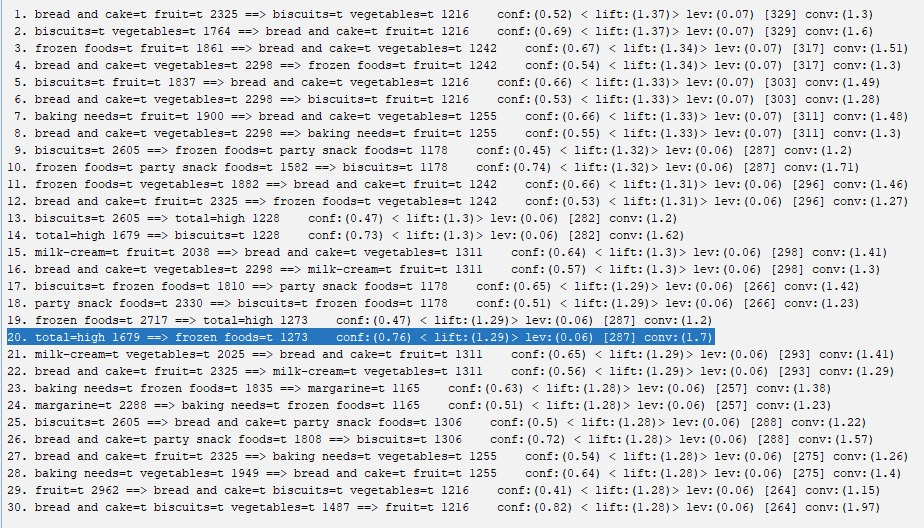

**Cenário**: Geralmente familias e pessoas que não tem muito tempo, ao fazerem a compra do mês preferem a escolha de comida congelada, pois ela por ser industrializada acaba sendo mais rápida e tendo maior validade, isso gera compras com valores altos.

**Intervenção de benefício ao cliente**: Ao cliente comprar comida congelada e o valor da compra total passar de 300 reais ele receberá um brinde de bebida, assim incentivando o cliente a comprar e gastar mais, recebendo um brinde para acompanhar a comida congelada.

**Suporte** | 287 | A regra aparece em 287 transações, o que representa uma frequência relevante. Isso indica que a relação não é um caso isolado.


**Confiança** | 0.76 | 76% dos clientes com compras de valor elevado também compram alimentos congelados. Isso demonstra uma forte tendência de compra conjunta.


**Lift** | 1.29 | A probabilidade de um cliente com compra total alta também comprar congelados é 29% maior do que o esperado pelo acaso. Isso indica uma correlação positiva e relevante entre os produtos.

**Leverage** | 0.06 | A relação entre os itens ocorre 6% mais vezes do que o esperado se fossem independentes.



---



## ▶ **Regra 2**:

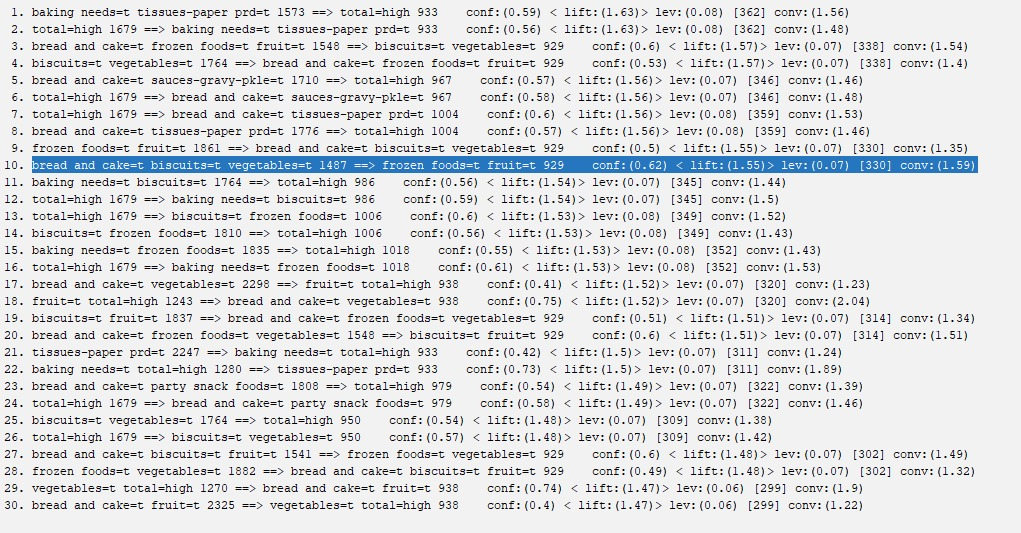

**Cenário**: Pessoas que compram pão e bolo, biscoitos e vegetais, tendem a comprar comida congelada e frutas, pois geralmente as pessoas que trabalham muito não tem tempo ou costume de cozinhar assim comprando produtos prontos e rápidos.

**Intervenção de benefício ao cliente**: A Aproximação dos locais de venda de comida congelada e frutas ao pão e bolo, biscoitos e os vegetais, para incetivar a compra e fazer os clientes economizarem tempo ao comprar.

**Suporte**	| 330 |	A regra apareceu em 330 transações. Isso mostra que há uma quantidade significativa de clientes com esse padrão de compra.

**Confiança** |	0.62 |	62% dos clientes que compraram pão/bolo, biscoitos e vegetais também compraram alimentos congelados. Essa confiança é razoável e indica uma relação relevante.

**Lift** |	1.55 | A chance de um cliente com esse perfil também comprar frutas e alimentos congelados é 55% maior do que o esperado pelo acaso. Isso mostra uma forte associação positiva.

**Leverage** |	0.07 |	A regra ocorre 7% mais vezes do que o esperado se os itens fossem independentes. Isso reforça que há uma conexão real e explorável comercialmente entre os produtos.



---



## ▶ **Regra 3**:

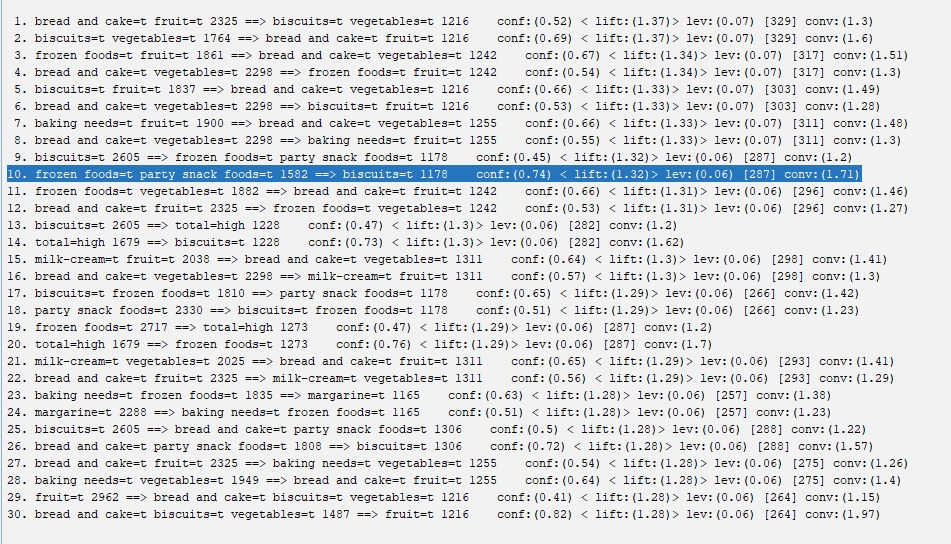

**Cenário**: As pessoas da região tem o costume de sempre ter um pote de certa marca de bisoito nas festas, por isso quando compram comida congelada e salgadinhos de festa também compram biscoitos, pois quem quer fazer uma festa compra comidas prontas e salgadinhos, e complementam com os biscoitos para ter mais variedade de acordo com a tradição.

**Intervenção de benefício ao cliente**: Um Possível "Combo Festa" onde clientes que queiram fazer festas podem comprar comida congelada, salgadinhos de festa e vão ter uma promoção ao comprar biscoitos junto.



**Suporte**	| 287 |	A regra apareceu em 287 transações.

**Confiança** |	0.74 | 74% dos clientes que compram comida congelada e salgadinhos de festa também compram biscoitos, indicando uma alta relação entre os produtos.

**Lift** |	1.32 | Tem 32% de chance a mais de um cliente escolher comprar esses itens em conjunto com biscoitos, do que a chance dele ter comprado junto por acaso.

**Leverage** |	0.06 | A compra em conjunta intencional dos itens ocorre 6% a mais de vezes do que a compra ao acaso.